# Import Statement

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

# Data Cleaning

In [2]:
data = pd.read_csv('hr_data.csv')
data

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48
...,...,...,...,...,...,...,...,...,...,...,...
14999,0.40,0.57,NaN,151,NaN,0.0,1,0,support,low,49
15000,0.37,0.48,NaN,160,NaN,NaN,1,0,support,low,3
15001,0.37,0.53,NaN,143,NaN,NaN,1,0,support,low,5
15002,0.11,0.96,NaN,280,NaN,NaN,1,0,support,low,78


In [3]:
print(data.columns)

Index(['Satisfaction Level', 'Last Evaluation', 'Number of Projects',
       'Monthly Hours', 'Total Time at the Company', 'Work Accidents',
       'Quit the Company', 'Promoted in Last 5 yrs', 'Departments ', 'salary',
       'Management'],
      dtype='object')


In [4]:
data.rename(columns={"Departments ": "Departments"}, inplace=True)
data.rename(columns={"salary": "Salary"}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         15004 non-null  float64
 1   Last Evaluation            15004 non-null  float64
 2   Number of Projects         14999 non-null  float64
 3   Monthly Hours              15004 non-null  int64  
 4   Total Time at the Company  14999 non-null  float64
 5   Work Accidents             15000 non-null  float64
 6   Quit the Company           15004 non-null  int64  
 7   Promoted in Last 5 yrs     15004 non-null  int64  
 8   Departments                15004 non-null  object 
 9   Salary                     15004 non-null  object 
 10  Management                 15004 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.3+ MB


In [6]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13536 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         13536 non-null  float64
 1   Last Evaluation            13536 non-null  float64
 2   Number of Projects         13536 non-null  float64
 3   Monthly Hours              13536 non-null  int64  
 4   Total Time at the Company  13536 non-null  float64
 5   Work Accidents             13536 non-null  float64
 6   Quit the Company           13536 non-null  int64  
 7   Promoted in Last 5 yrs     13536 non-null  int64  
 8   Departments                13536 non-null  object 
 9   Salary                     13536 non-null  object 
 10  Management                 13536 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 1.2+ MB


In [7]:
data.describe()

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Management
count,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000,13536.000000
mean,0.607934,0.716435,3.805482,201.190898,3.422872,0.141327,0.261229,0.015810,12.829418
std,0.251048,0.171937,1.256026,50.348130,1.305369,0.348371,0.439321,0.124743,26.195403
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.250000,4.000000,0.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,100.000000


In [8]:
data['Quit the Company'].value_counts()

,count
Quit the Company,
0,10000
1,3536


In [9]:
data_cleaned = data
data_cleaned

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,Salary,Management
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151,3.0,0.0,1,0,support,low,49
14995,0.37,0.48,2.0,160,3.0,0.0,1,0,support,low,3
14996,0.37,0.53,2.0,143,3.0,0.0,1,0,support,low,5
14997,0.11,0.96,6.0,280,4.0,0.0,1,0,support,low,78


# Exploratory Data Analysis

## Univariate analysis

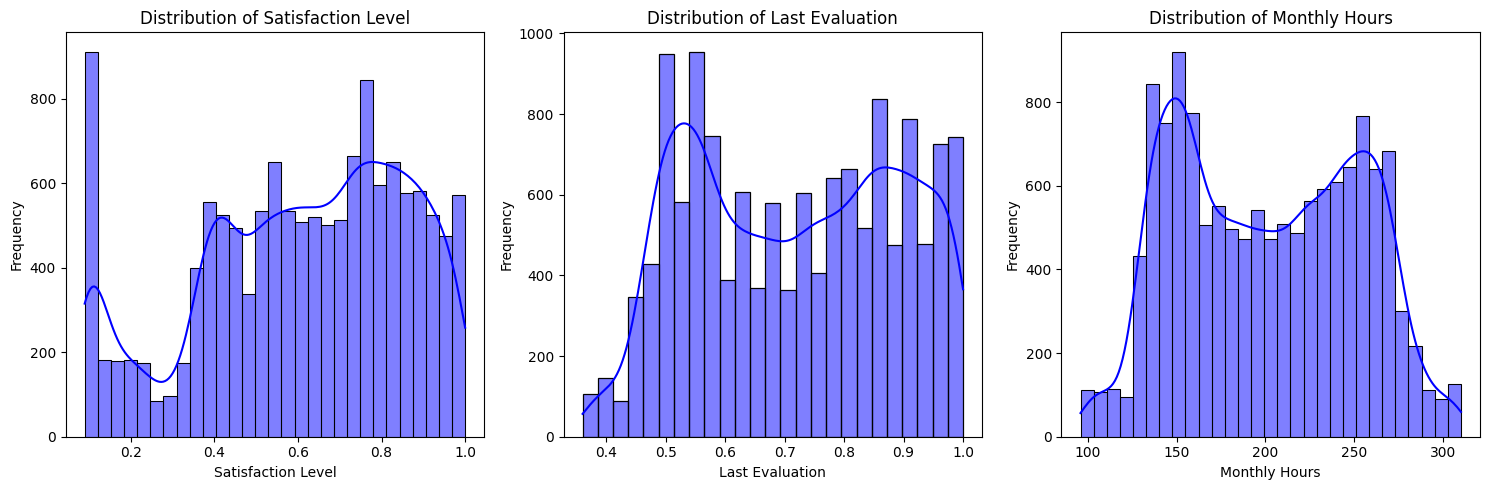

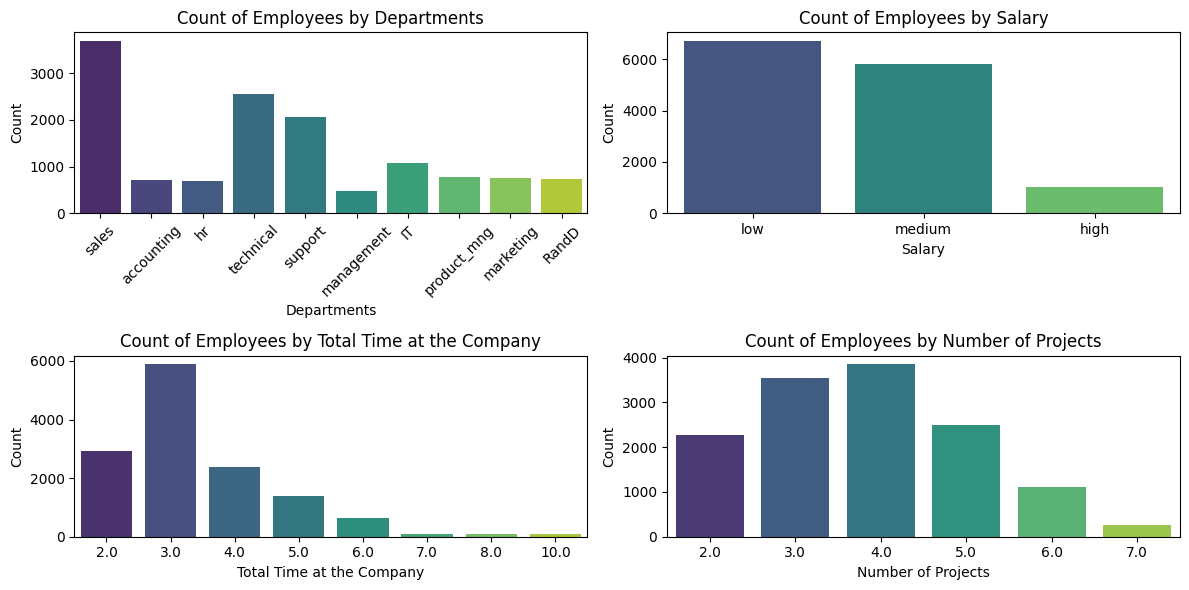

In [10]:
numeric_columns = ["Satisfaction Level", "Last Evaluation", "Monthly Hours" ]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Exploring categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
axes = axes.flatten()

categorical_columns = ["Departments", "Salary", "Total Time at the Company", "Number of Projects"]
for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Count of Employees by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

    if col == "Departments":
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Bivariate analysis

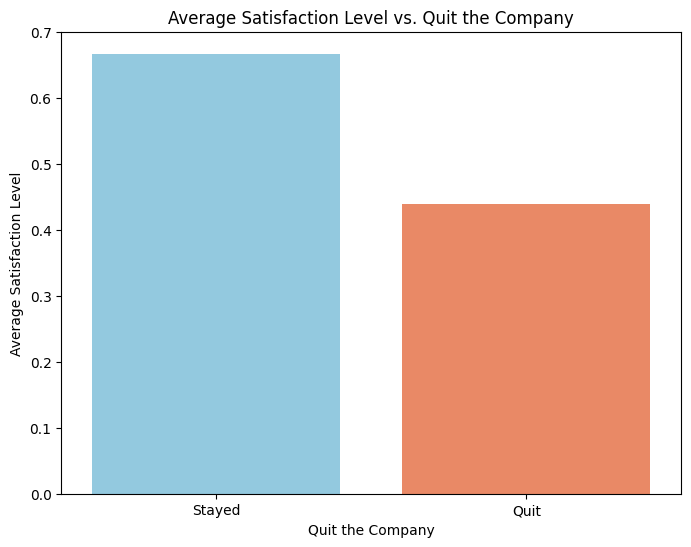

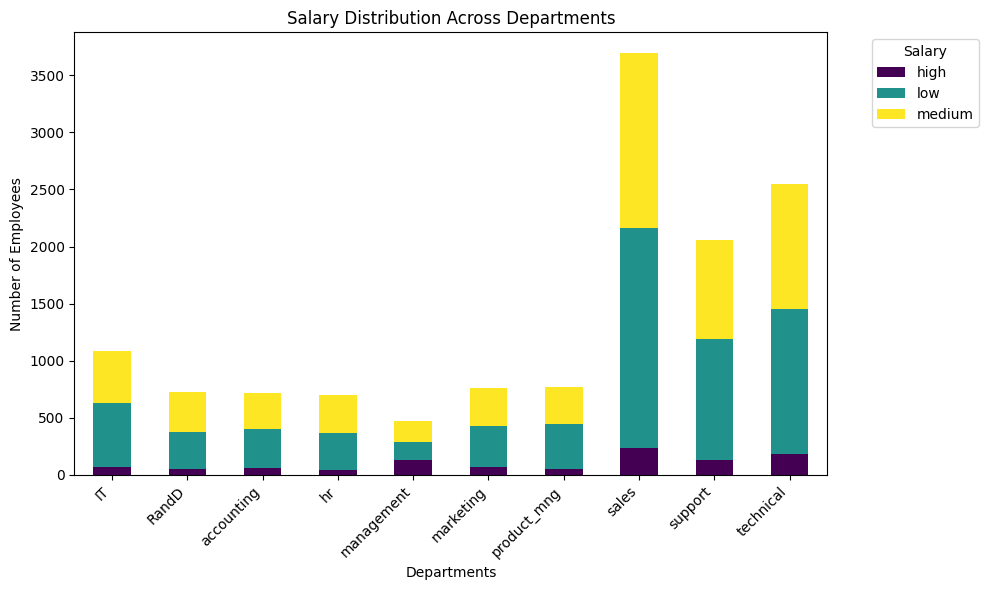

In [15]:
# Group by 'Quit the Company' and calculate the mean satisfaction level
satisfaction_by_quit = data_cleaned.groupby('Quit the Company')['Satisfaction Level'].mean().reset_index()
satisfaction_by_quit.columns = ['Quit the Company', 'Average Satisfaction Level']

plt.figure(figsize=(8, 6))
sns.barplot(x='Quit the Company', y='Average Satisfaction Level', data=satisfaction_by_quit, palette=['skyblue', 'coral'])
plt.title('Average Satisfaction Level vs. Quit the Company')
plt.xlabel('Quit the Company')
plt.ylabel('Average Satisfaction Level')
plt.xticks([0, 1], ['Stayed', 'Quit'])
plt.show()


# Group the data_cleaned by department and salary, then count the occurrences
salary_dept_counts = data_cleaned.groupby(['Departments', 'Salary']).size().unstack(fill_value=0)
salary_dept_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Salary Distribution Across Departments')
plt.xlabel('Departments')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Salary', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


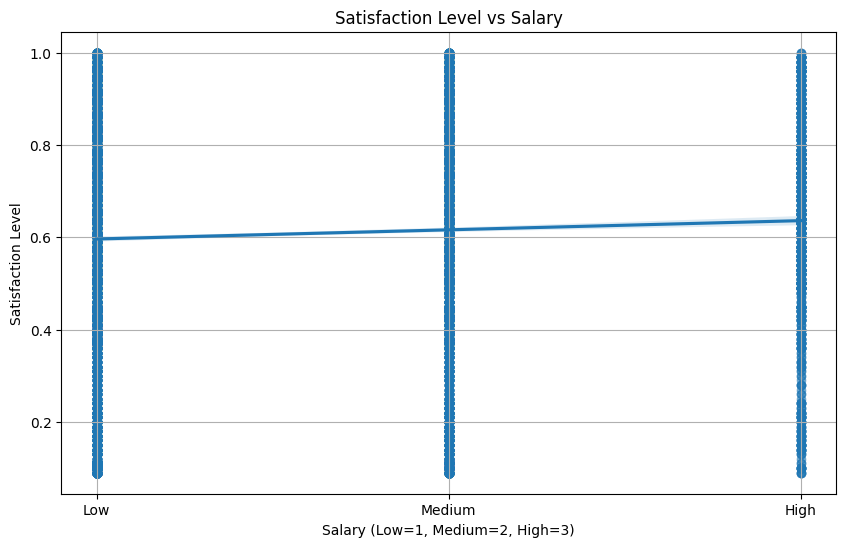

Correlation between Salary and Satisfaction Level: 0.05


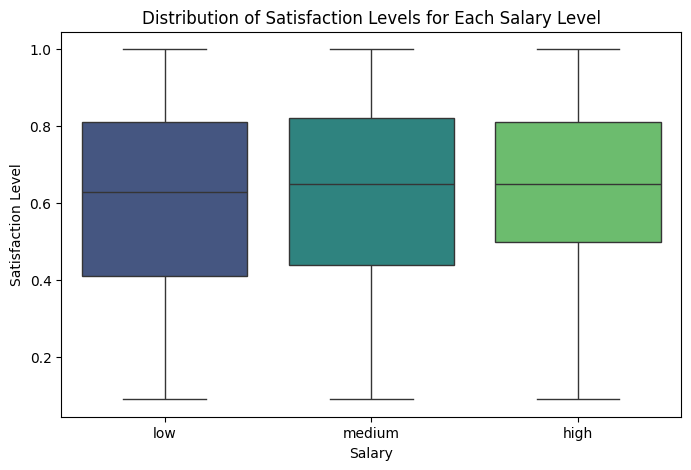

In [12]:
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
data_cleaned['Salary_Ordinal'] = data_cleaned['Salary'].map(salary_mapping)

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Salary_Ordinal', y='Satisfaction Level', data=data_cleaned, scatter_kws={'alpha':0.5})

plt.title('Satisfaction Level vs Salary')
plt.xlabel('Salary (Low=1, Medium=2, High=3)')
plt.ylabel('Satisfaction Level')
plt.xticks([1,2,3],['Low','Medium','High'])
plt.grid(True)
plt.show()

# Correlation
correlation = data_cleaned['Salary_Ordinal'].corr(data_cleaned['Satisfaction Level'])
print(f"Correlation between Salary and Satisfaction Level: {correlation:.2f}")

plt.figure(figsize=(8, 5))
sns.boxplot(x='Salary', y='Satisfaction Level', data=data_cleaned, palette='viridis')
plt.title('Distribution of Satisfaction Levels for Each Salary Level')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.show()

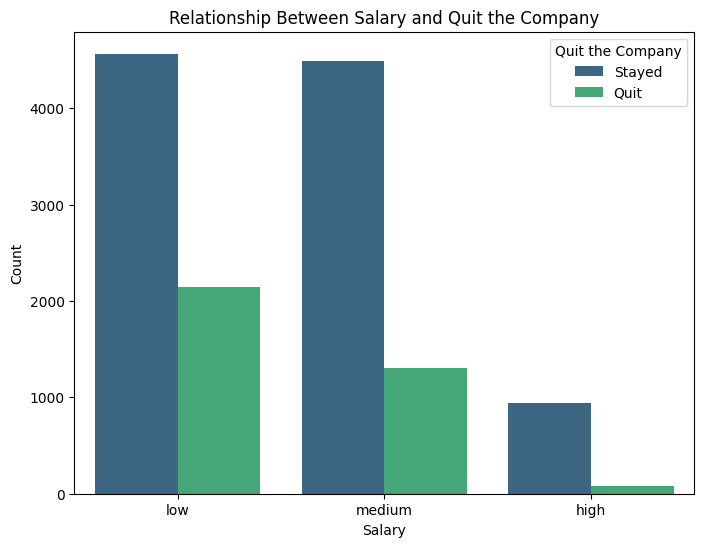

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x="Salary", hue="Quit the Company", palette="viridis")
plt.title("Relationship Between Salary and Quit the Company")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(title="Quit the Company", labels=["Stayed", "Quit"])
plt.show()


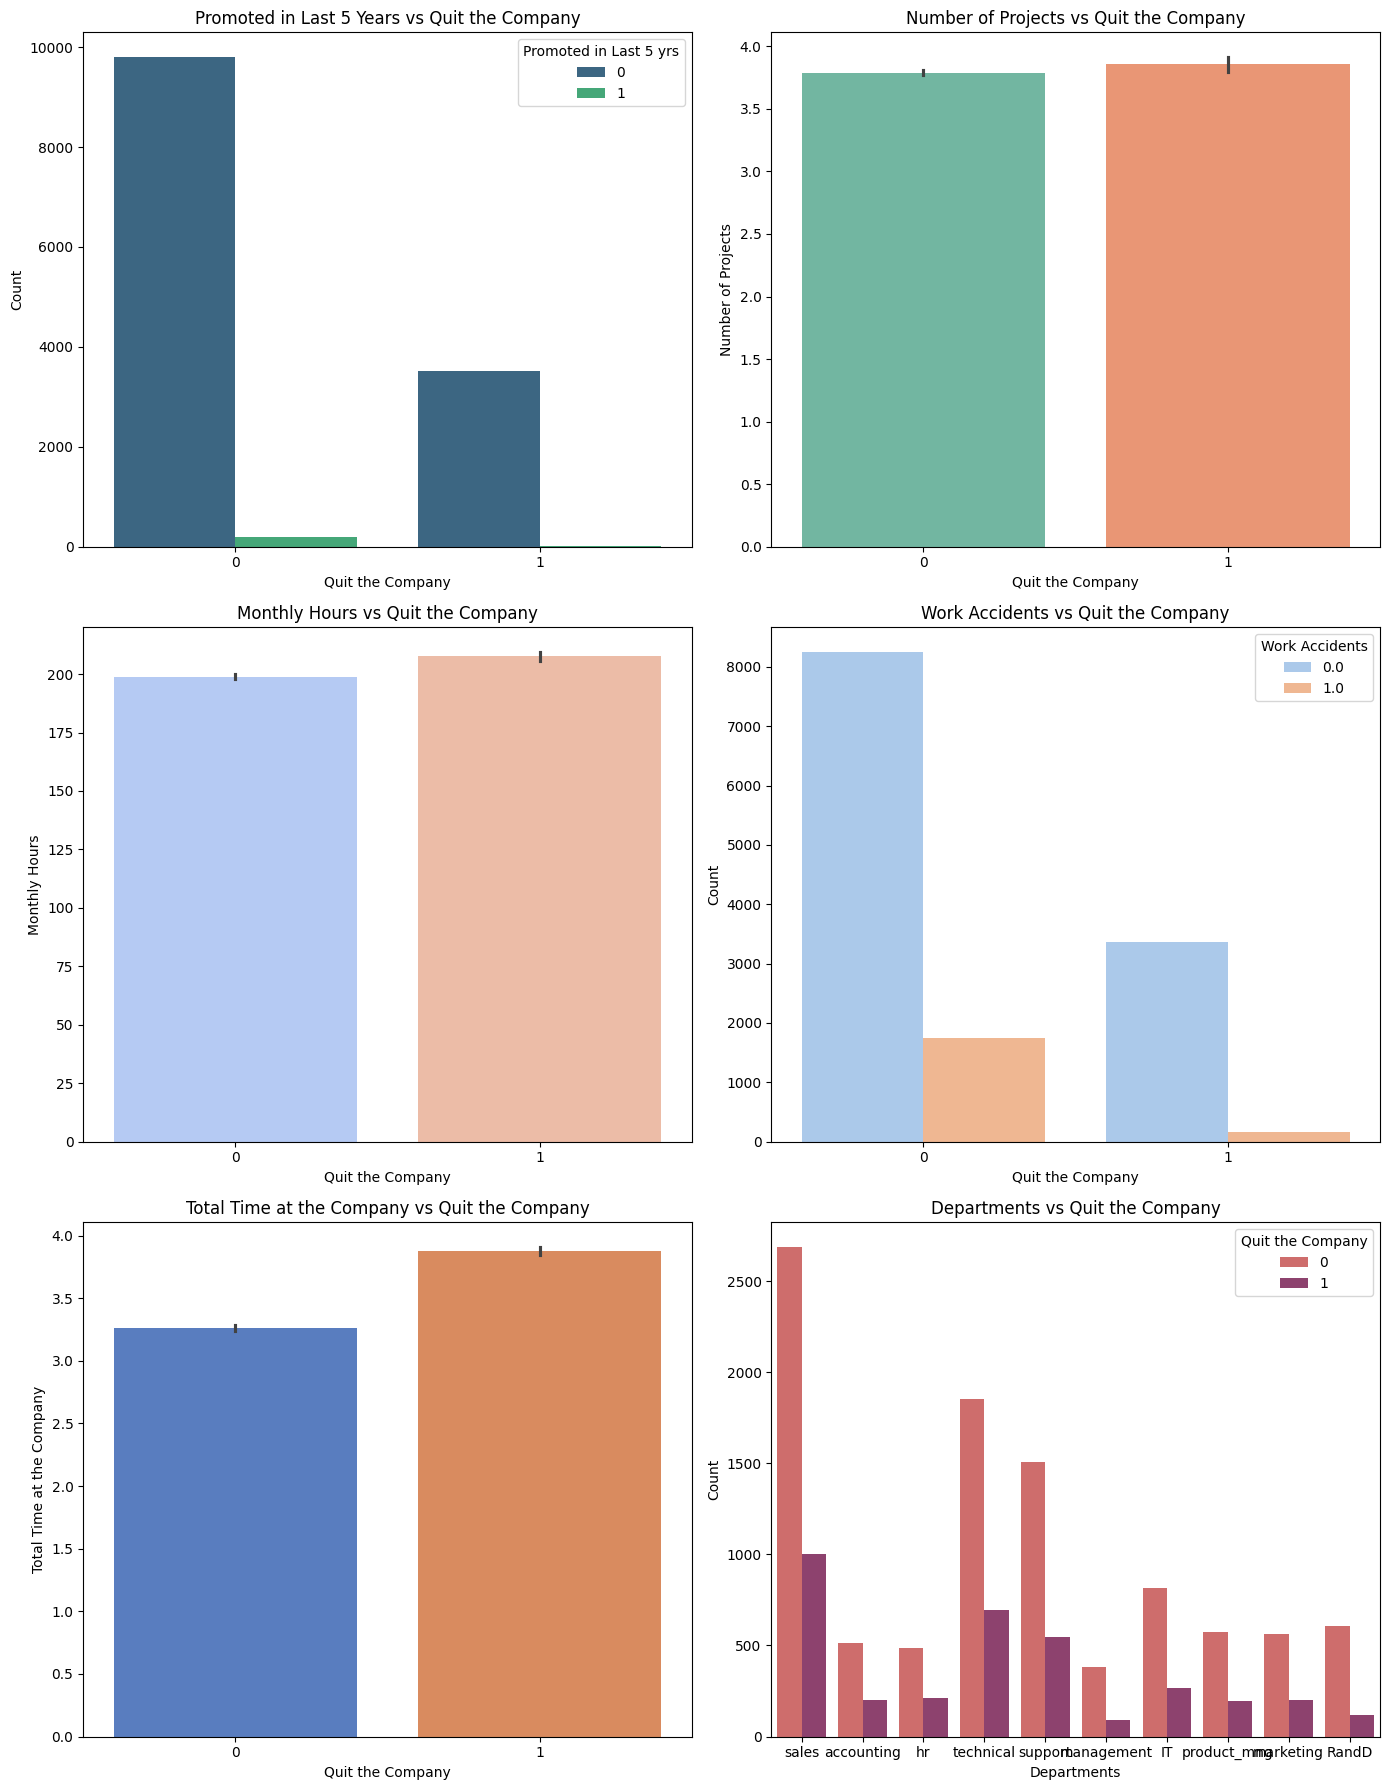

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

# 1. Promoted in Last 5 Years vs Quit the Company
sns.countplot(data=data_cleaned, x="Quit the Company", hue="Promoted in Last 5 yrs", ax=axes[0], palette="viridis")
axes[0].set_title("Promoted in Last 5 Years vs Quit the Company")
axes[0].set_xlabel("Quit the Company")
axes[0].set_ylabel("Count")

# 2. Number of Projects vs Quit the Company
sns.barplot(data=data_cleaned, x="Quit the Company", y="Number of Projects", ax=axes[1], palette="Set2")
axes[1].set_title("Number of Projects vs Quit the Company")
axes[1].set_xlabel("Quit the Company")
axes[1].set_ylabel("Number of Projects")

# 3. Monthly Hours vs Quit the Company
sns.barplot(data=data_cleaned, x="Quit the Company", y="Monthly Hours", ax=axes[2], palette="coolwarm")
axes[2].set_title("Monthly Hours vs Quit the Company")
axes[2].set_xlabel("Quit the Company")
axes[2].set_ylabel("Monthly Hours")

# 4. Work Accidents vs Quit the Company
sns.countplot(data=data_cleaned, x="Quit the Company", hue="Work Accidents", ax=axes[3], palette="pastel")
axes[3].set_title("Work Accidents vs Quit the Company")
axes[3].set_xlabel("Quit the Company")
axes[3].set_ylabel("Count")

# 5. Total Time at the Company vs Quit the Company
sns.barplot(data=data_cleaned, x="Quit the Company", y="Total Time at the Company", ax=axes[4], palette="muted")
axes[4].set_title("Total Time at the Company vs Quit the Company")
axes[4].set_xlabel("Quit the Company")
axes[4].set_ylabel("Total Time at the Company")

# 6. Departments vs Quit the Company
sns.countplot(data=data_cleaned, x="Departments", hue="Quit the Company", ax=axes[5], palette="flare")
axes[5].set_title("Departments vs Quit the Company")
axes[5].set_xlabel("Departments")
axes[5].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Multivariate analysis

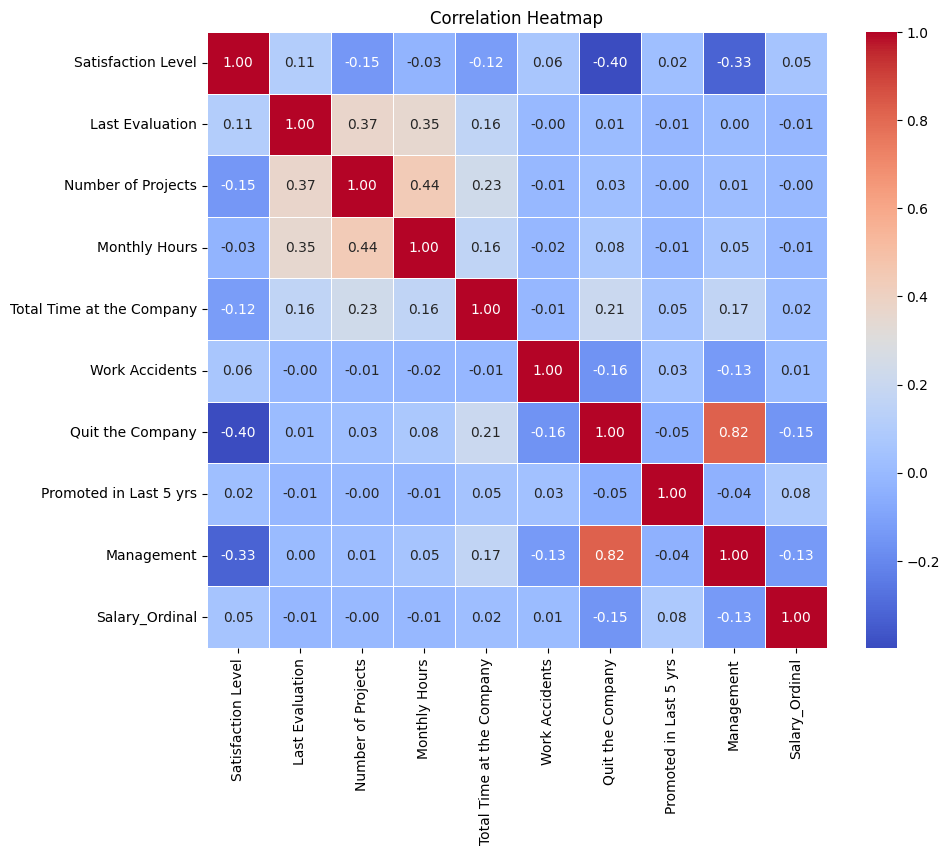

In [21]:
# Correlation heatmap
correlation_matrix = data_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing

In [22]:
label = LabelEncoder()
data_cleaned = pd.get_dummies(data_cleaned, columns=['Departments'])
data_cleaned = data_cleaned.drop(columns=['Salary_Ordinal'])
data_cleaned['Salary'] = label.fit_transform(data_cleaned['Salary'])
data

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Departments,Salary,Management,Salary_Ordinal
0,0.38,0.53,2.0,157,3.0,0.0,1,0,sales,low,31,1
1,0.80,0.86,5.0,262,6.0,0.0,1,0,sales,medium,71,2
2,0.11,0.88,7.0,272,4.0,0.0,1,0,sales,medium,8,2
3,0.72,0.87,5.0,223,5.0,0.0,1,0,sales,low,68,1
4,0.37,0.52,2.0,159,3.0,0.0,1,0,sales,low,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151,3.0,0.0,1,0,support,low,49,1
14995,0.37,0.48,2.0,160,3.0,0.0,1,0,support,low,3,1
14996,0.37,0.53,2.0,143,3.0,0.0,1,0,support,low,5,1
14997,0.11,0.96,6.0,280,4.0,0.0,1,0,support,low,78,1


In [23]:
data_preprocessed = data_cleaned
data_preprocessed

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Total Time at the Company,Work Accidents,Quit the Company,Promoted in Last 5 yrs,Salary,Management,Departments_IT,Departments_RandD,Departments_accounting,Departments_hr,Departments_management,Departments_marketing,Departments_product_mng,Departments_sales,Departments_support,Departments_technical
0,0.38,0.53,2.0,157,3.0,0.0,1,0,1,31,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5.0,262,6.0,0.0,1,0,2,71,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7.0,272,4.0,0.0,1,0,2,8,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5.0,223,5.0,0.0,1,0,1,68,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2.0,159,3.0,0.0,1,0,1,48,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151,3.0,0.0,1,0,1,49,False,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2.0,160,3.0,0.0,1,0,1,3,False,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2.0,143,3.0,0.0,1,0,1,5,False,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6.0,280,4.0,0.0,1,0,1,78,False,False,False,False,False,False,False,False,True,False


# Model Training

In [24]:
scaler = StandardScaler()
unscaled_inputs = data_preprocessed.drop(columns=['Quit the Company', 'Management'])
scaled_inputs = scaler.fit_transform(unscaled_inputs)
targets = data_preprocessed['Quit the Company']
X = scaled_inputs
y = targets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [27]:
importances = model.feature_importances_
feature_names = unscaled_inputs.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                      Feature  Importance
0          Satisfaction Level    0.327295
4   Total Time at the Company    0.196625
2          Number of Projects    0.170511
3               Monthly Hours    0.143261
1             Last Evaluation    0.123697
7                      Salary    0.010318
5              Work Accidents    0.009394
17      Departments_technical    0.003250
15          Departments_sales    0.002955
16        Departments_support    0.002289
9           Departments_RandD    0.001659
11             Departments_hr    0.001562
12     Departments_management    0.001361
10     Departments_accounting    0.001307
6      Promoted in Last 5 yrs    0.001240
13      Departments_marketing    0.001201
8              Departments_IT    0.001180
14    Departments_product_mng    0.000894


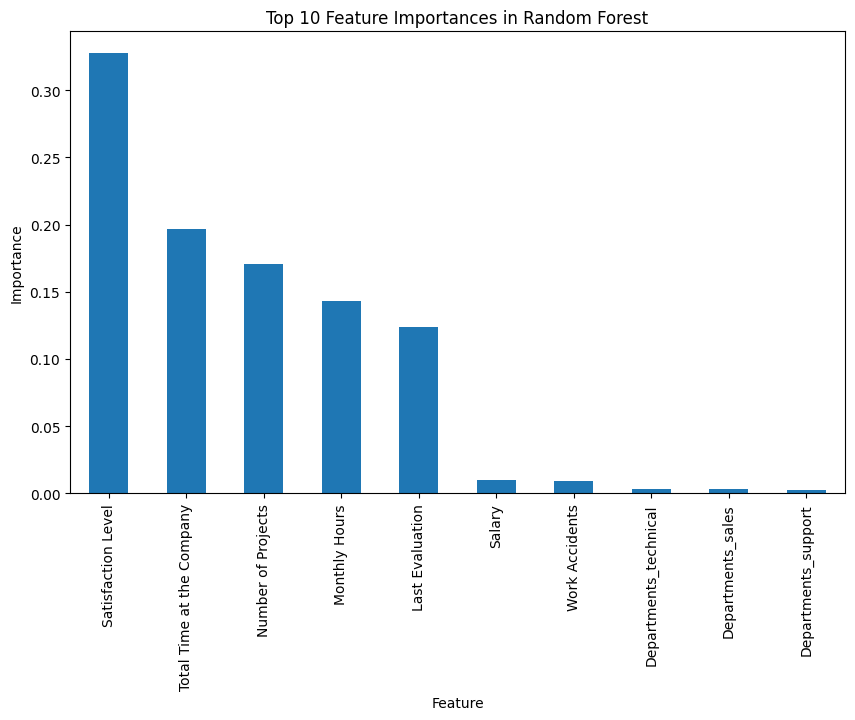

In [28]:
feature_importance_df.head(10).plot(
    x='Feature', y='Importance', kind='bar', legend=False, figsize=(10, 6)
)
plt.title("Top 10 Feature Importances in Random Forest")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

In [29]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.990029542097489

In [30]:
cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

array([0.98707295, 0.98522622, 0.98707295, 0.98707295, 0.98430286,
       0.98799631, 0.99261311, 0.98891967, 0.99445471, 0.99260628])

In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1977,    5],
       [  22,  704]])

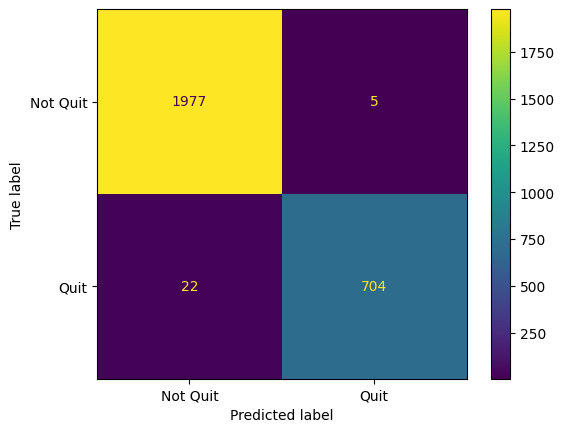

In [32]:
ConfusionMatrixDisplay(cm, display_labels=['Not Quit', 'Quit']).plot()

In [33]:
data_preprocessed['Predictions'] = model.predict(X)

## Save model

In [34]:
with open('hr_model', 'wb') as file:
    pickle.dump(model, file)

In [35]:
data_preprocessed.to_excel('hr_data_preprocessed.xlsx', index=False)
feature_importance_df.to_excel('feature_importance.xlsx', index=False)